# MODUL 3 : TRANSFORMASI WAVELET

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

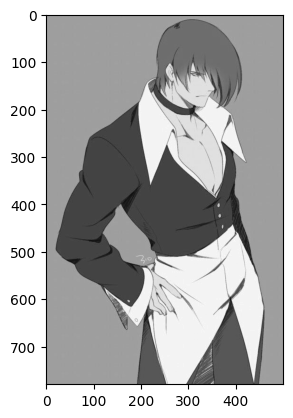

In [2]:
image = plt.imread("IoriYagami.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image,cmap="gray")

## Dekomposisi

In [11]:
def decompose_levels(citra, f1, f2, levels):
    def decompose(citra, f1, f2):
        f1_pad = len(f1) - 1
        citra_pad = np.pad(citra, [(0, 0), (0, f1_pad)])

        conv1 = np.zeros(citra.shape)
        for i in range(citra.shape[0]):
            for j in range(citra.shape[1]):
                for k in range(len(f1)):
                    conv1[i][j] += f1[k] * citra_pad[i, j + k]

        ll = np.zeros((conv1.shape[0] // 2, conv1.shape[1]))
        index = 0
        for i in range(ll.shape[0]):
            for j in range(ll.shape[1]):
                ll[i][j] = conv1[index][j]
            index += 2
        
        f2_pad = len(f2) - 1
        ll_pad = np.pad(ll, [(0, f2_pad), (0, 0)])

        conv2 = np.zeros(ll.shape)
        for i in range(ll.shape[0]):
            for j in range(ll.shape[1]):
                for k in range(len(f2)):
                    conv2[i][j] += f2[k] * ll_pad[i + k, j]
        
        ll2 = np.zeros((conv2.shape[0], conv2.shape[1] // 2))
        for i in range(ll2.shape[0]):
            for j in range(ll2.shape[1]):
                ll2[i][j] = conv2[i][2 * j]
        
        return ll2

    decompositions = [citra]
    
    for _ in range(levels - 1):
        citra = decompose(citra, f1, f2)
        decompositions.append(citra)
    
    return decompositions

def normalize(images):
    a = ((images) - np.min(images))/(np.max(images) - np.min(images))
    return a

low_pass = np.array([0.5, 0.5])
high_pass = np.array([-0.7, 0.7])
lldec = [normalize(img) for img in decompose_levels(image, low_pass, low_pass, levels=7)]
hldec = [normalize(img) for img in decompose_levels(lldec[0], high_pass, low_pass, levels=7)]
lhdec = [normalize(img) for img in decompose_levels(lldec[0], low_pass, high_pass, levels=7)]
hhdec = [normalize(img) for img in decompose_levels(lldec[0], high_pass, high_pass, levels=7)]

Kode diatas merupakan pembuatan fungsi dekomposisi citra pada berbagai level. Fungsi ini mengamnil citra asli, filer 1 dan 2 serta level sebagai parameternya. Filter ini bertanggung jawab untuk membagi citra input menjadi serangkaian citra yang semakin terperinci. Ini dilakukan dengan melakukan serangkaian operasi konvolusi menggunakan dua filter.

Setiap level dekomposisi melibatkan proses konvolusi dengan filter rendah dan filter tinggi. Proses konvolusi ini dilakukan berulang kali, sebanyak level yang ditentukan. Hasil dekomposisi pada setiap level disimpan, dan kemudian dinormalisasi.

In [43]:
def combine_images(ll, hl, lh, hh):
    combined_image = np.block([[ll, lh], [hl, hh]])
    return combined_image
combined_image = combine_images(lldec[1], hldec[1], lhdec[1], hhdec[1])


Fungsi diatas merupakan fubgsi buatan yang digunakan untuk menggabungkan empat citra hasil dekomposisi dari berbagai filter pada suatu level tertentu menjadi satu citra. Proses ini dilakukan dengan menyusun citra-citra tersebut ke dalam satu gambar.

Citra-citra tersebut diletakkan di dalam gambar gabungan sesuai dengan posisi relatif mereka dalam tata letak matriks blok numpy. Misalnya, ll (low-low), hl (high-low), lh (low-high), dan hh (high-high) mewakili empat jenis citra hasil dekomposisi. Matriks blok numpy dibuat dengan menyusun empat citra tersebut ke dalam blok 2x2, dengan ll di sudut kiri atas, lh di sudut kanan atas, hl di sudut kiri bawah, dan hh di sudut kanan bawah.

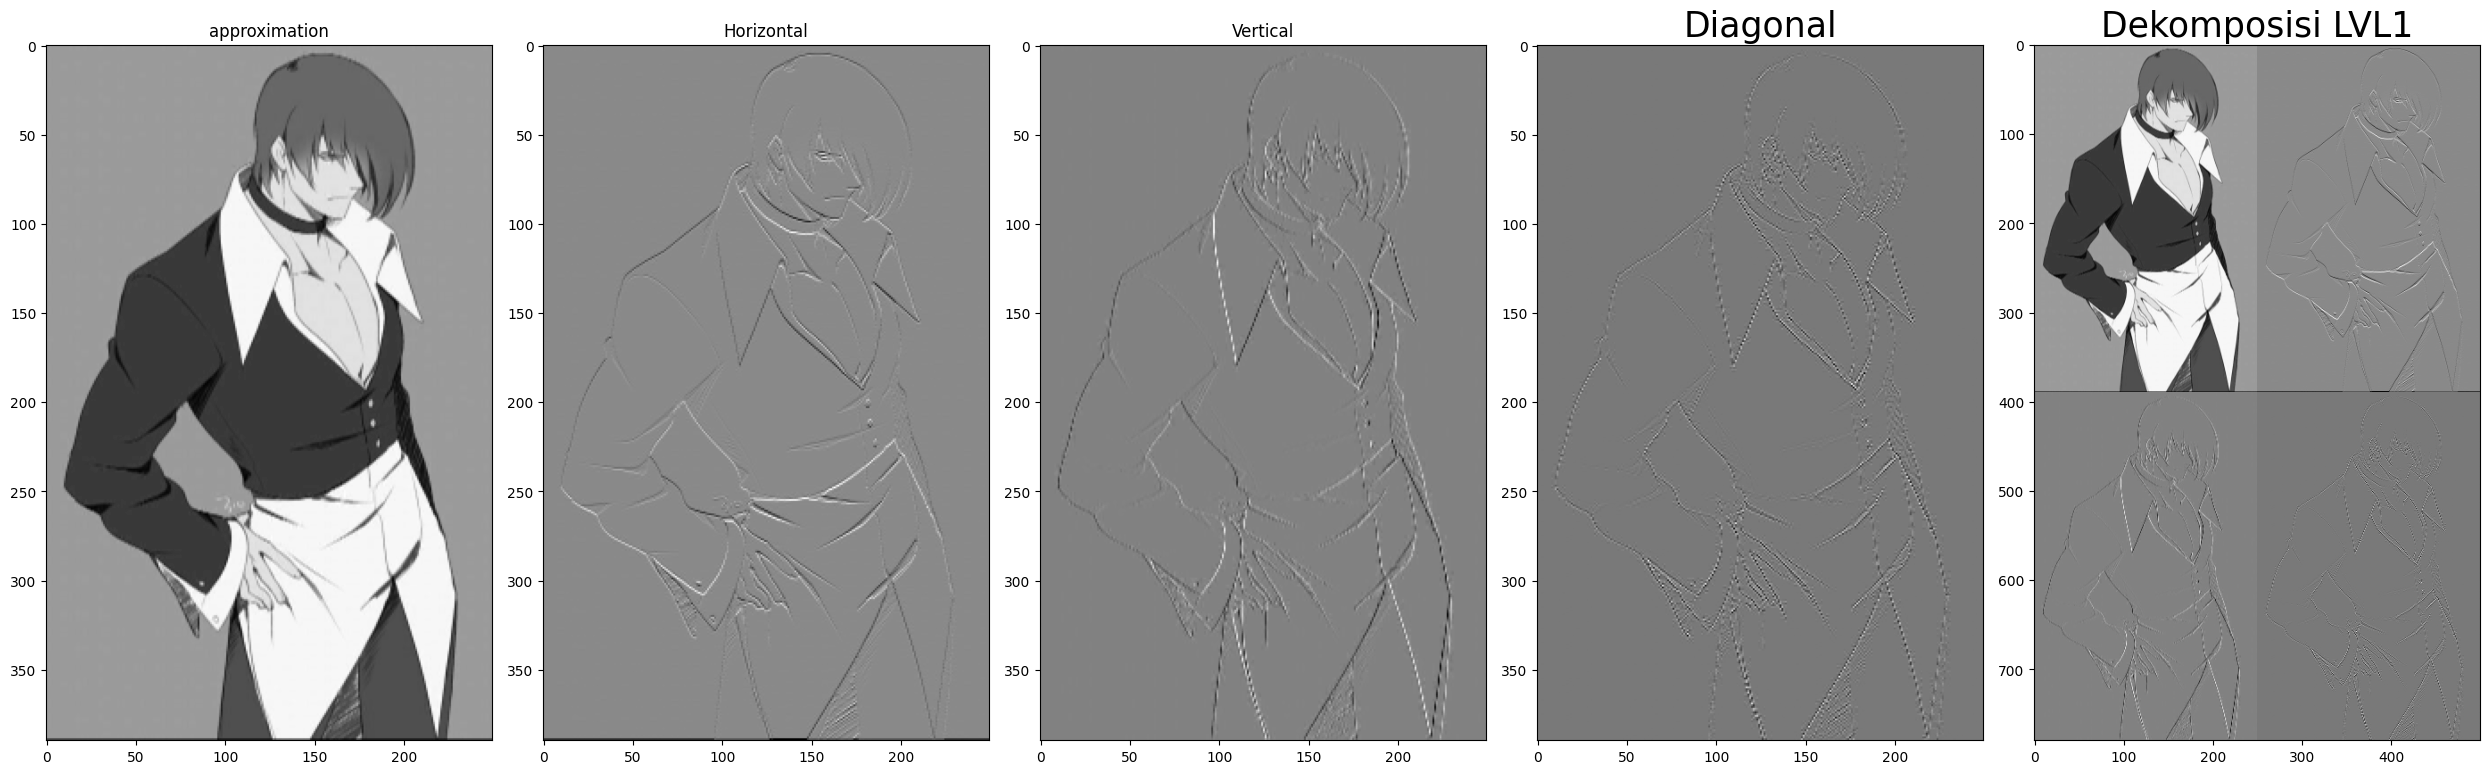

In [13]:
fig, axs = plt.subplots(1, 5, figsize=[25, 10])

axs[0].imshow(lldec[1], cmap="gray")
axs[0].set_title('approximation')

axs[1].imshow(lhdec[1], cmap="gray")
axs[1].set_title('Horizontal Detail')

axs[2].imshow(hldec[1], cmap="gray")
axs[2].set_title('Vertical Detail')

axs[3].imshow(hhdec[1], cmap="gray")
axs[3].set_title('Diagonal Detail', fontsize=25)

axs[4].imshow(combined_image, cmap="gray")
axs[4].set_title('Dekomposisi LVL 1', fontsize=25) 

plt.tight_layout()
plt.show()

### Display Dinamis

Fungsi dibawah merupaan fungsi buatan bernama display_decomposition_levels. Fungsi ini digunakan untuk menampilkan hasil dekomposisi citra pada rentang level tertentu. 

Pada setiap iterasi dari loop for, fungsi ini menggabungkan citra-citra hasil dekomposisi pada level tertentu menggunakan fungsi combine_images. Citra gabungan kemudian ditampilkan menggunakan plt.imshow, dengan judul yang sesuai dengan level dekomposisi yang ditampilkan.

Parameter start_level dan end_level menentukan rentang level yang akan ditampilkan.

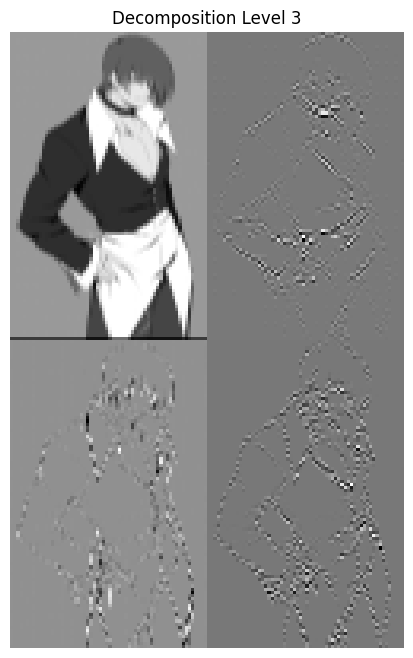

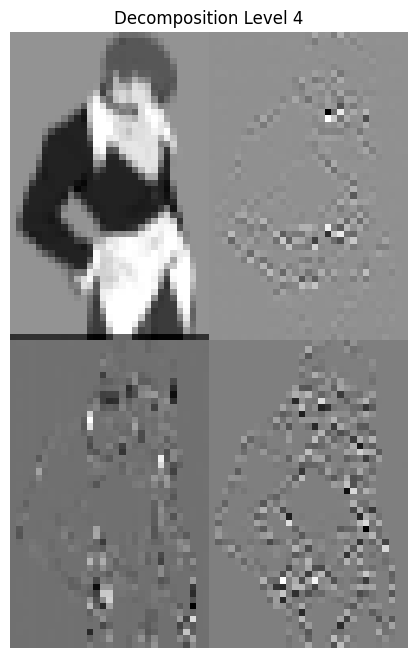

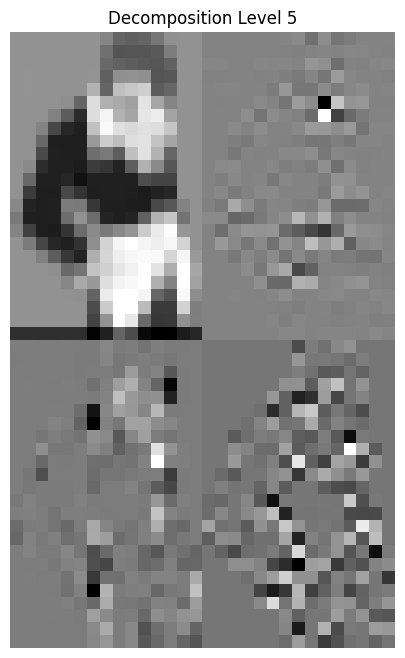

In [33]:
def display_decomposition_levels(lldec, hldec, lhdec, hhdec, start_level, end_level):
    num_levels = len(lldec)
    for level in range(start_level, end_level+1):
        combined_image = combine_images(lldec[level], hldec[level], lhdec[level], hhdec[level])
        plt.figure(figsize=(8, 8))
        plt.imshow(combined_image, cmap='gray')
        plt.title(f'Decomposition Level {level}')
        plt.axis('off')
        plt.show()

start_level = 3
end_level = 5
display_decomposition_levels(lldec, hldec, lhdec, hhdec, start_level, end_level)

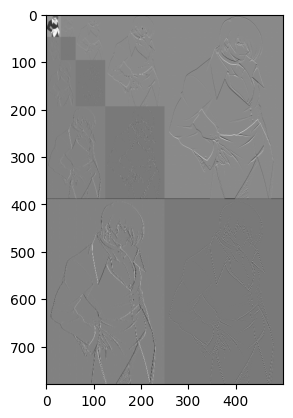

In [28]:
dcom1 = decompose_levels(combined_image, low_pass, low_pass, levels=7)
comb1 = combine_images(dcom1[1], hldec[1], lhdec[1], hhdec[1])
dcom2 = decompose_levels(comb1, low_pass, low_pass, levels=7)
comb2 = combine_images(dcom2[1], hldec[1], lhdec[1], hhdec[1])
dcom3 = decompose_levels(comb2, low_pass, low_pass, levels=7)
comb3 = combine_images(dcom3[1], hldec[1], lhdec[1], hhdec[1])
plt.imshow(comb3, cmap='gray')

### Rekonstruksi

In [ ]:
def reconstruction(ll, lh, hl, hh):
    l = np.zeros((ll.shape[0]*2,ll.shape[1]))
    h = np.zeros((ll.shape[0]*2,ll.shape[1]))
    result = np.zeros((ll.shape[0]*2,ll.shape[1]*2),)

    for i in range(ll.shape[0]) :
        for j in range(ll.shape[1]) :
            l[i*2,j] = ll[i,j]/low_pass[0] + lh[i,j]/high_pass[0]
            l[i*2+1,j] = ll[i,j]/low_pass[1] + lh[i,j]/high_pass[1]

            h[i*2,j] = hl[i,j]/low_pass[0] + hh[i,j]/high_pass[0]
            h[i*2+1,j] = hl[i,j]/low_pass[1] + hh[i,j]/high_pass[1]
    
    for i in range(l.shape[0]) :
        for j in range(l.shape[1]) :
            result[i,j*2] = l[i,j]/low_pass[0] + h[i,j]/high_pass[0]
            result[i,j*2+1] = l[i,j]/low_pass[1] + h[i,j]/high_pass[1]
    
    return result

Kode diatas merupakan pembuatan fungsi rekonstruksi .Rekonstruksi dilakukan dengan menggabungkan citra-citra hasil dekomposisi menggunakan low-pass filter dan high-pass filter. Citra-citra tersebut direkonstruksi dalam dua tahap: pertama, citra-citra dengan resolusi rendah dan tinggi digabungkan secara vertikal; kedua, citra hasil gabungan tersebut digabungkan secara horizontal.

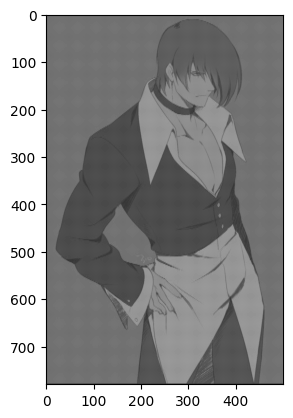

In [ ]:
rekons = reconstruction(lldec[1],lhdec[1], hldec[1], hhdec[1])
plt.imshow(rekons, cmap = "gray")

###  Pada Level ke 6 Dekomposisi 

Hal ini karena semakin sering di lakukan proses dekomposisi semakin kurang jelas suatu gambar. Ketika proses dekomposisi dilakukan pada level yang lebih tinggi, informasi frekuensi tinggi (misalnya, detail-detail halus) menjadi lebih mendominasi karena fitur-fitur halus ini mulai ditangkap oleh filter yang digunakan. Akibatnya, komponen frekuensi tinggi ini menyebabkan gambar terlihat lebih "pecah" atau memiliki lebih banyak detail pada level yang lebih tinggi.

Selain itu, proses dekomposisi pada level yang lebih tinggi juga dapat menyebabkan kehilangan informasi secara bertahap dari gambar asli karena beberapa frekuensi tinggi atau detail halus dapat dihilangkan atau dikurangi secara signifikan pada setiap level dekomposisi.

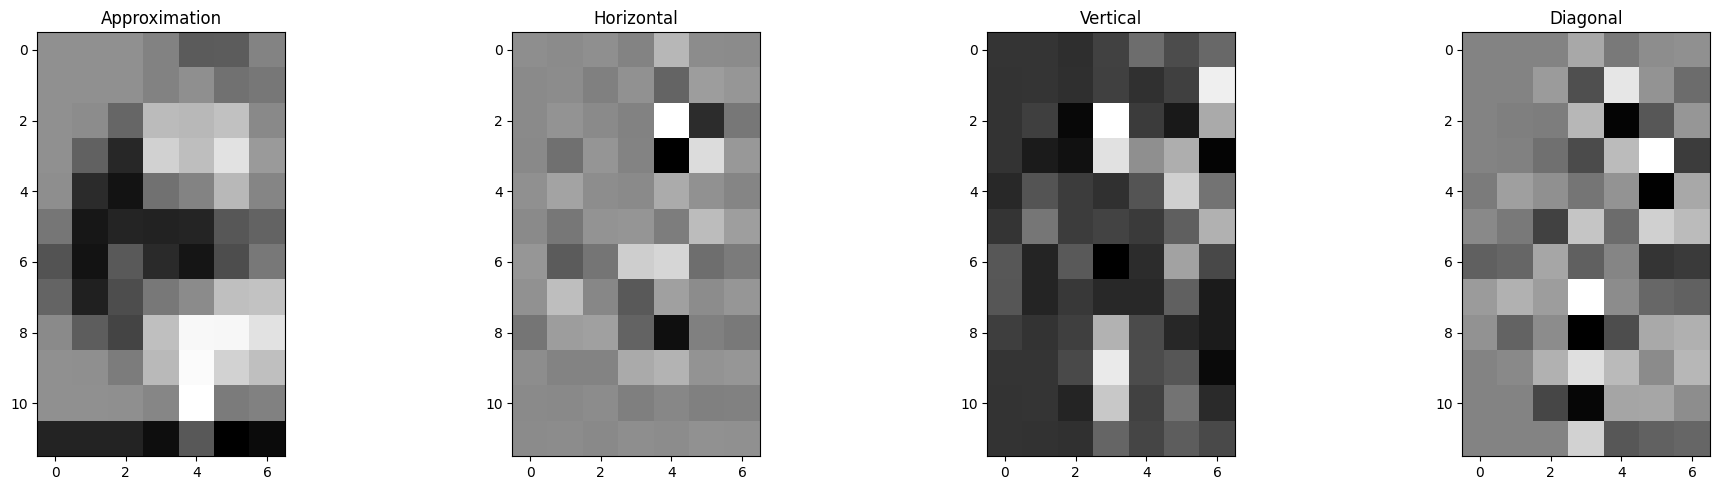

In [29]:
fig, axs = plt.subplots(1, 4, figsize=[20, 5])

axs[0].imshow(lldec[6], cmap="gray")  
axs[0].set_title('Approximation')

axs[1].imshow(lhdec[6], cmap="gray")
axs[1].set_title('Horizontal')

axs[2].imshow(hldec[6], cmap="gray")
axs[2].set_title('Vertical')

axs[3].imshow(hhdec[6], cmap="gray")
axs[3].set_title('Diagonal')

plt.tight_layout()
plt.show()


### Representasi Sinyal dari dekomposisi Level 6

Kode dibawah meruoakan fungsi amp yang bertujuan untuk menghitung amplitudo citra yang diberikan. Amplitudo ini diperoleh dengan melakukan normalisasi terhadap nilai piksel citra, sehingga nilainya berada dalam rentang antara 0 dan 255. Proses normalisasi ini memastikan bahwa seluruh rentang intensitas citra digunakan secara maksimal.

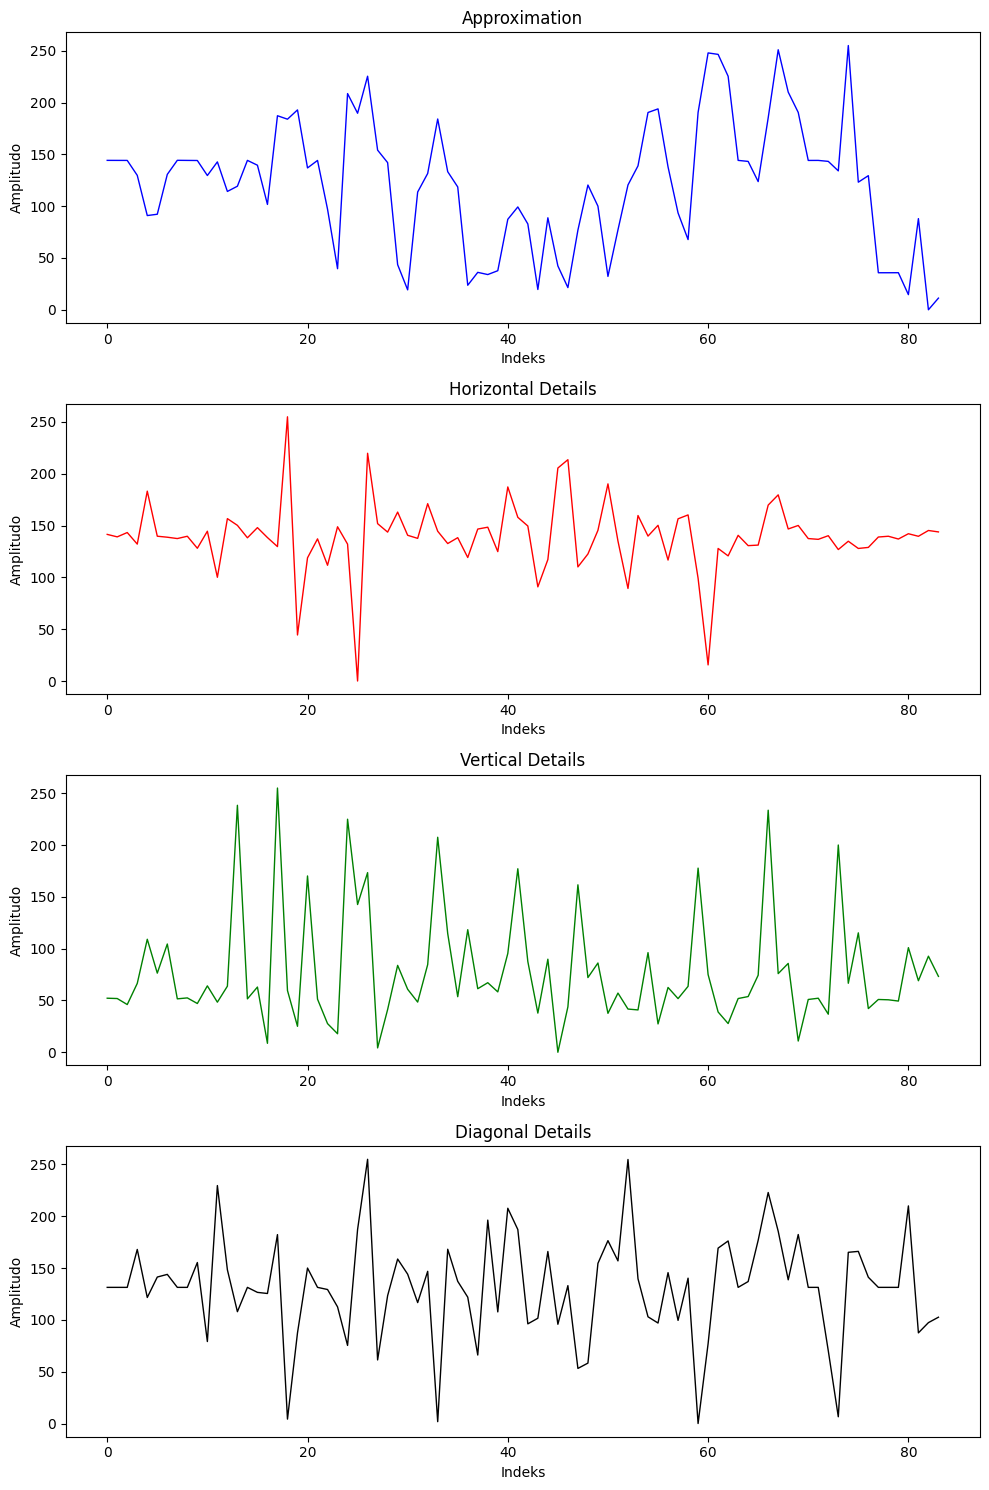

In [30]:
def amp(img):
    amplitude = (img - np.min(img)) * (255 / (np.max(img) - np.min(img)))
    index = np.arange(img.size).reshape(img.shape)

    return amplitude, index

lly, llx = amp(lldec[6])
lhy, lhx = amp(lhdec[6])
hly, hlx = amp(hldec[6])
hhy, hhx = amp(hhdec[6])
        
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

axes[0].plot(llx.flatten(), lly.flatten(), 'b-', linewidth=1)
axes[0].set_title("Approximation") 
axes[0].set_xlabel("Indeks")
axes[0].set_ylabel("Amplitudo")

axes[1].plot(lhx.flatten(), lhy.flatten(), 'r-', linewidth=1)
axes[1].set_title("Horizontal Details")
axes[1].set_xlabel("Indeks")
axes[1].set_ylabel("Amplitudo")

axes[2].plot(hlx.flatten(), hly.flatten(), 'g-', linewidth=1)
axes[2].set_title("Vertical Details")
axes[2].set_xlabel("Indeks")
axes[2].set_ylabel("Amplitudo")

axes[3].plot(hhx.flatten(), hhy.flatten(), 'k-', linewidth=1)
axes[3].set_title("Diagonal Details")
axes[3].set_xlabel("Indeks")
axes[3].set_ylabel("Amplitudo")

plt.tight_layout()
plt.show()